In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
PRICE_PATH = 'BTC-USD.csv'
SENTIMENT_PATH = 'btc_reddit_sentiment_3.csv'

In [33]:
btc_price_df = pd.read_csv(os.path.abspath('data/{}'.format(PRICE_PATH)))
btc_price_df.columns = btc_price_df.columns.str.lower()
btc_price_df.date = pd.to_datetime(btc_price_df.date).dt.date

In [34]:
btc_sent_df = pd.read_csv(os.path.abspath('data/results/{}'.format(SENTIMENT_PATH)), encoding='utf-8', sep=';')

In [35]:
btc_sent_df.date = pd.to_datetime(btc_sent_df.date).dt.date

In [36]:
daily_sentiment = btc_sent_df.groupby('date')['sentiment'].mean()
daily_sentiment = pd.DataFrame({'date': daily_sentiment.index, 'sentiment': daily_sentiment.values})

In [37]:
daily_sentiment.head()

,date,sentiment
0,2021-01-01,0.236842
1,2021-01-02,0.131579
2,2021-01-03,0.221591
3,2021-01-04,0.090395
4,2021-01-05,0.262570


In [38]:
merged_price_sent = pd.merge(btc_price_df, daily_sentiment, on='date', how='inner')

In [39]:
merged_price_sent.head(15)

,date,open,high,low,close,adj close,volume,sentiment
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.236842
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.131579
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.221591
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.090395
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.262570
5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,0.206030
6,2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,0.245000
7,2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,0.236181
8,2021-01-09,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837,0.261307
9,2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690,0.169231


In [40]:
def convert_to_multiday(df, days=7):
    df['change'] = 0.0
    df['change_pct'] = 0.0

    for index, row in df.iterrows():
        if len(df) > index + days:
            df.loc[index, 'change'] = (df.loc[index + days, 'close'] - row['open'])
            df.loc[index, 'change_pct'] = change_pct = (df.loc[index + days, 'close'] - row['open']) / row['open']
            df.loc[index, 'sentiment'] = df.loc[index:index + days, 'sentiment'].mean()
            df.loc[index, 'increased'] = 1 if change_pct > 0 else 0
    
    df = df[::days]
    
    df['change'] = df['change'].shift(-1)
    df['change_pct'] = df['change_pct'].shift(-1)

    return df

In [41]:
weekly_price_sent = convert_to_multiday(merged_price_sent, days=1)

In [42]:
# df = merged_price_sent
df = weekly_price_sent

In [43]:
df.head()

,date,open,high,low,close,adj close,volume,sentiment,change,change_pct,increased
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.184211,3405.568360,0.115928,1.0
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.176585,-157.494140,-0.004902,1.0
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.155993,1181.480469,0.036009,0.0
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.176483,4847.322265,0.151588,1.0
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.234300,5357.429688,0.157508,1.0


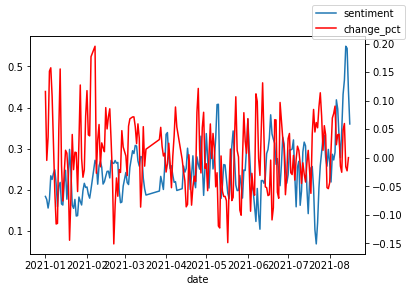

In [44]:
ax = df.plot(x="date", y="sentiment", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="change_pct", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

# sns.lineplot(x="date", y="sentiment", hue="close", data=merged_price_sent)

In [45]:
df.corr()

,open,high,low,close,adj close,volume,sentiment,change,change_pct,increased
open,1.000000,0.991647,0.984183,0.979020,0.979020,0.262341,0.236002,-0.167092,-0.172700,-0.097101
high,0.991647,1.000000,0.984195,0.991117,0.991117,0.283958,0.229282,-0.177080,-0.184180,-0.047673
low,0.984183,0.984195,1.000000,0.989648,0.989648,0.194639,0.247973,-0.162639,-0.172983,-0.039744
close,0.979020,0.991117,0.989648,1.000000,1.000000,0.243495,0.245066,-0.167700,-0.176737,0.008368
adj close,0.979020,0.991117,0.989648,1.000000,1.000000,0.243495,0.245066,-0.167700,-0.176737,0.008368
volume,0.262341,0.283958,0.194639,0.243495,0.243495,1.000000,-0.182148,-0.077116,-0.061371,-0.064749
sentiment,0.236002,0.229282,0.247973,0.245066,0.245066,-0.182148,1.000000,-0.103869,-0.111697,-0.028982
change,-0.167092,-0.177080,-0.162639,-0.167700,-0.167700,-0.077116,-0.103869,1.000000,0.977734,0.427662
change_pct,-0.172700,-0.184180,-0.172983,-0.176737,-0.176737,-0.061371,-0.111697,0.977734,1.000000,0.422731
increased,-0.097101,-0.047673,-0.039744,0.008368,0.008368,-0.064749,-0.028982,0.427662,0.422731,1.000000
